In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer,WordNetLemmatizer
from tensorflow.keras.layers import Dense,Embedding,Bidirectional,LSTM,Conv1D,GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
text = pd.read_csv("Emotion_final.csv")

In [5]:
text.Emotion.replace({'sadness':0,'anger':1,'love':2,'surprise':3,'fear':4,'happy':5},inplace=True)

In [7]:
text

,Text,Emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1
...,...,...
21754,"I'm not feeling down; in fact, I'm quite content.",5
21755,"The joy in my heart is a constant, unwavering ...",5
21756,Happiness is my chosen state of mind.,5
21757,This moment is pure happiness.,5


In [8]:
text.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [9]:
text.Emotion.value_counts()

5    7329
0    6265
1    2993
4    2652
2    1641
3     879
Name: Emotion, dtype: int64

In [3]:
happy =["Bubbling with happiness and positive energy.",
"Not a single cloud in the sky of my emotions; pure sunshine.",
"I'm not melancholic; I'm filled with unbridled joy.",
"Life's symphony is playing the melody of happiness.",
"No room for sorrow to nest; my heart is a nest of joy.",
"I'm not feeling low-spirited; I'm soaring with joy.",
"The joy in my heart is a constant, unwavering flame.",
"I'm not discontented; I'm contentment personified.",
"Happiness is the compass guiding me through life.",
"Every heartbeat echoes the rhythm of joy.",
"I'm not forlorn; I'm flourishing in happiness.",
"Radiating positivity like the sun radiates warmth.",
"No shadows of sadness; only beams of joy surround me.",
"I'm not in the doldrums; I'm in the heights of ecstasy.",
"Life's tapestry is woven with threads of happiness.",
"I'm not in a state of gloom; I'm wrapped in bliss.",
"The laughter in my soul drowns out any hint of sadness.",
"Not a tinge of melancholy; my heart is a garden of joy.",
"Happiness is the color palette of my emotions.",
"I'm not disheartened; my heart beats with optimism.",
"Gleaming with happiness like a beacon in the night.",
"No trace of sorrow; my emotional landscape is serene.",
"I'm not feeling dejected; I'm infused with delight.",
"My spirit is not subdued; it dances with joy.",
"The canvas of my emotions is painted with happiness.",
"I'm not mournful; I'm celebrating the joy of existence.",
"Joy is the melody, and my heart is the symphony.",
"Not a moment of despair; my heart is a sanctuary of happiness.",
"I'm not in the doldrums; I'm riding the waves of joy.",
"Overflowing with happiness, like a cup that never empties.",
"No room for sorrow; only the sweet fragrance of joy.",
"I'm not unhappy; I'm cocooned in the warmth of happiness.",
"The sun of happiness shines bright in my emotional sky.",
"Not a shadow of gloom; only sunshine in my soul.",
"I'm not disheartened; my heart beats with optimism.",
"Radiating joy like the sun radiates its golden rays.",
"I'm not crestfallen; I'm on cloud nine with happiness.",
"No room for sorrow to linger; joy is my constant companion.",
"The joy within me is an ever-burning flame.",
"I'm not in a funk; I'm enveloped in the embrace of joy.",
"My heart is not heavy; it's lightened by the wings of happiness.",
"No room for sorrow in the symphony of my emotions.",
"I'm not in the doldrums; I'm dancing to the rhythm of joy.",
"Radiant with happiness, like the moon in the night sky.",
"Not a cloud of sadness; only a sky full of happiness.",
"I'm not in a state of gloom; I'm bathed in sunshine.",
"No signs of sorrow; only a trail of joy in my wake.",
"I'm not unhappy; I'm swimming in the sea of happiness.",
"Brimming with joy like a cup that overflows.",
"I'm not in the shadows; I'm standing in the spotlight of happiness.",
"I'm so happy today!",
"This joyful moment is priceless.",
"Not a single trace of sadness in my heart.",
"Happiness is contagious, and I'm spreading it around!",
"Couldn't be happier with life right now.",
"Feeling on top of the world!",
"I'm not feeling down; in fact, I'm quite content.",
"Every day brings new reasons to be cheerful.",
"No room for gloominess; my heart is full of joy.",
"I'm not sad; I'm genuinely elated!",
"A burst of happiness just brightened my day.",
"I can't help but smile at the beautiful moments in life.",
"Absolutely delighted with the outcome.",
"Not a moment of sorrow; only happiness resides here.",
"Happiness is my constant companion.",
"This is the kind of happiness that lasts.",
"I'm not downhearted; I'm bursting with happiness.",
"Life is full of delightful surprises.",
"No room for sorrow; my heart is brimming with joy.",
"I'm far from being sad; I'm genuinely thrilled!",
"Pure joy flows through my veins.",
"I'm not unhappy; I'm immersed in pure bliss.",
"Radiating positivity and happiness.",
"Today is a happy day, no room for negativity.",
"I'm not feeling low; I'm high on happiness.",
"Overflowing with gratitude and joy.",
"Not a frown in sight, only smiles and laughter.",
"Happiness is my chosen state of mind.",
"I'm not in a bad mood; I'm in a fantastic mood!",
"This moment is pure happiness.",
"No sadness allowed; joy is the order of the day.",
"I'm not discontent; I'm thoroughly content.",
"Radiant with happiness from within.",
"Life is too short not to be happy!",
"I'm not in despair; I'm embracing happiness.",
"Pure and unfiltered happiness right now.",
"No time for gloom; only happy vibes here.",
"I'm not upset; I'm filled with joy.",
"I'm not feeling blue; I'm feeling jubilant!",
"Overflowing with happiness and positivity.",
"I'm not displeased; I'm overjoyed!",
"Today is a good day; happiness is in the air.",
"No signs of unhappiness; only smiles today.",
"I'm not sorrowful; I'm celebrating joy.",
"Grinning from ear to ear; happiness prevails.",
"Not a hint of sadness; I'm brimming with happiness.",
"Life is treating me well; I'm happy.",
"I'm not in low spirits; I'm in high spirits!",
"Happiness is the soundtrack of my day.",
"No room for sorrow; my heart is dancing with joy."]

In [4]:
happy_df = pd.DataFrame({
    'Text': happy,
    'Emotion': ['happy'] * len(happy)
})
happy_df = happy_df.sample(300,replace=True)
text = pd.concat([text, happy_df], ignore_index=True,axis=0)

In [10]:
text.head()

,Text,Emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1


In [6]:
hap_count,sad_count,anger_count,fear_count,love_count,sup_count = text.Emotion.value_counts()

In [11]:
anger_ov = text[text.Emotion==1]
fear_ov = text[text.Emotion==4]
hap_ov = text[text.Emotion==5]
lov_ov = text[text.Emotion==2]
sad_ov = text[text.Emotion==0]
sup_ov = text[text.Emotion==3]


df_anger = anger_ov.sample(hap_count,replace=True,random_state=42)
df_fear = fear_ov.sample(hap_count,replace=True,random_state=42)
df_lov = lov_ov.sample(hap_count,replace=True,random_state=42)
df_sad= sad_ov.sample(hap_count,replace=True,random_state=42)
df_sup = sup_ov.sample(hap_count,replace=True,random_state=42)

In [13]:
text = pd.concat([hap_ov,df_anger,df_fear,df_lov,df_sad,df_sup],axis=0)

In [14]:
text.Emotion.value_counts()

5    7329
1    7329
4    7329
2    7329
0    7329
3    7329
Name: Emotion, dtype: int64

In [15]:
# def handle_negations_for_emotions(text):
#     negations = set(['not', 'but', 'no', 'never', 'none', 'neither', 'nor', 'cannot', "doesn't", "didn't", "won't", "isn't", "aren't", "wasn't", "weren't", "hasn't", "haven't", "can't", "couldn't"])
#     words = text.lower()
#     words = words.split()
#     for i in range(len(words)):
#         if words[i] in negations and i < len(words) - 1:
#             words[i + 1] = 'not_' + words[i + 1]
#     return ' '.join(words)

In [240]:
stemma = PorterStemmer()
lemma = WordNetLemmatizer()
print(lemma.lemmatize('disappointed'))
print(stemma.stem('disappointed'))

disappointed
disappoint


In [18]:
corpus = []

for index,content in text.iterrows():
    text.at[index,'Text'] = re.sub('[^a-zA-Z]', ' ', str(content['Text'])).lower()
    sen = content['Text'].strip()
    corpus.append(sen)

In [19]:
corpus[:3]

['i have been with petronas for years i feel that petronas has performed well and made a huge profit',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
 'i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious']

In [20]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1

print(f"total words in corpus {total_words}")

total words in corpus 18117


In [21]:
text_sequence = tokenizer.texts_to_sequences(corpus)

In [22]:
max_len = max([len(sen) for sen in text_sequence])
text_padded = pad_sequences(text_sequence,maxlen=max_len,padding='post')

In [23]:
text_padded

array([[   2,   23,   55, ...,    0,    0,    0],
       [   2,   41,    3, ...,    0,    0,    0],
       [   2,   23, 4411, ...,    0,    0,    0],
       ...,
       [   2,   79,    8, ...,    0,    0,    0],
       [   2,    3,   14, ...,    0,    0,    0],
       [   2,   51,   74, ...,    0,    0,    0]])

In [24]:
x_train,x_test,y_train,y_test = train_test_split(text_padded,text.Emotion,test_size=0.2,random_state=42)

In [25]:
len(x_train),len(y_train),len(x_test),len(y_test)

(35179, 35179, 8795, 8795)

In [26]:
x_train.shape,y_test.shape

((35179, 66), (8795,))

In [27]:
class_name = ["sadness","anger","love",'suprise','fear','happy']

In [28]:
model = tf.keras.models.Sequential([
    Embedding(total_words,200,input_length=max_len),
    Bidirectional(LSTM(100,return_sequences=True)),
    Bidirectional(LSTM(50)),
    Dense(6,activation='softmax')
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 200)           3623400   
                                                                 
 bidirectional (Bidirection  (None, 66, 200)           240800    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 100)               100400    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 3965206 (15.13 MB)
Trainable params: 3965206 (15.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['acc'])

callback = tf.keras.callbacks.EarlyStopping(monitor='acc',patience=2)

In [31]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[callback],epochs=4)

Epoch 1/4
1100/1100 [==============================] - 220s 189ms/step - loss: 0.5420 - acc: 0.8026 - val_loss: 0.1792 - val_acc: 0.9443
Epoch 2/4
1100/1100 [==============================] - 212s 193ms/step - loss: 0.1135 - acc: 0.9627 - val_loss: 0.1361 - val_acc: 0.9572
Epoch 3/4
1100/1100 [==============================] - 216s 197ms/step - loss: 0.0638 - acc: 0.9789 - val_loss: 0.1191 - val_acc: 0.9628
Epoch 4/4
1100/1100 [==============================] - 213s 194ms/step - loss: 0.0418 - acc: 0.9859 - val_loss: 0.1080 - val_acc: 0.9686


In [49]:
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
predicted = model.predict(x_test)

275/275 [==============================] - 14s 50ms/step


In [37]:
prediction= []
for i in predicted:
    label = np.argmax(i)
    prediction.append(label)

In [40]:
prediction[:5]

[2, 3, 0, 0, 0]

In [41]:
y_test[:5]

9224     2
9194     3
370      0
7178     0
15811    0
Name: Emotion, dtype: int64

In [43]:
cm = confusion_matrix(y_test,prediction)

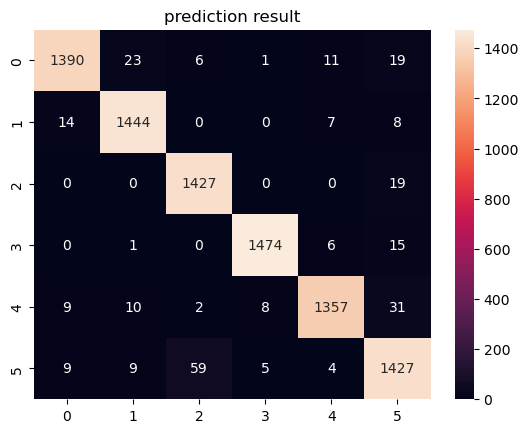

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
           annot=True,
           fmt='d')
plt.title('prediction result');

In [51]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1450
           1       0.97      0.98      0.98      1473
           2       0.96      0.99      0.97      1446
           3       0.99      0.99      0.99      1496
           4       0.98      0.96      0.97      1417
           5       0.94      0.94      0.94      1513

    accuracy                           0.97      8795
   macro avg       0.97      0.97      0.97      8795
weighted avg       0.97      0.97      0.97      8795



In [226]:
def Negation(sentence):
        '''
        Input: Tokenized sentence (List of words)
        Output: Tokenized sentence with negation handled (List of words)
        '''
        temp = int(0)
        for i in range(len(sentence)):
          if sentence[i-1] in ['not',"n't"]:
              antonyms = []
              for syn in wordnet.synsets(sentence[i]):
                  syns = wordnet.synsets(sentence[i])
                  w1 = syns[0].name()
                  temp = 0
                  for l in syn.lemmas():
                      if l.antonyms():
                          antonyms.append(l.antonyms()[0].name())
                  max_dissimilarity = 0
                  for ant in antonyms:
                      syns = wordnet.synsets(ant)
                      w2 = syns[0].name()
                      syns = wordnet.synsets(sentence[i])
                      w1 = syns[0].name()
                      word1 = wordnet.synset(w1)
                      word2 = wordnet.synset(w2)
                      if isinstance(word1.wup_similarity(word2), float) or isinstance(word1.wup_similarity(word2), int):
                          temp = 1 - word1.wup_similarity(word2)
                      if temp>max_dissimilarity:
                          max_dissimilarity = temp
                          antonym_max = ant
                          sentence[i] = antonym_max
                          sentence[i-1] = ''
        while '' in sentence:
          sentence.remove('')
        return sentence

In [227]:
sentence = nltk.word_tokenize("i don't know how to handle pressure")
print(Negation(sentence))

['i', 'do', 'ignore', 'how', 'to', 'handle', 'pressure']


In [152]:
stop_words = ['in']

In [310]:
text_input = ["guys im feeling low all time"]
sentence = nltk.word_tokenize(str(text_input))
sentence = Negation(sentence)
input_text =' '.join(sentence)
text = re.sub('[^a-zA-Z]', ' ', str(input_text)).lower()
text = re.sub(' +',' ',str(text))
sen = text.strip()
print(sen)
text_input = tokenizer.texts_to_sequences([sen])
print(text_input)
embedding_docs = pad_sequences(text_input,padding='post',maxlen=max_len)

guys im feeling low all time
[[643, 18, 9, 469, 36, 54]]


In [311]:
class_name[np.argmax(model.predict(embedding_docs))]

1/1 [==============================] - 0s 47ms/step


'sadness'

In [312]:
model.save('Emotion system.keras')

In [2]:
from keras.models import load_model

In [ ]:
model